**Part I  
Tabular Solution Methods**

p1(page 29):

+ 이 파트에서는, 강화학습 알고리즘의 핵시적인 아이디어들을 최대한 간단한 형태로 다룬다.  
+ "the simplest form - small enough for the approximate action-value function"
+ 이런 경우, 최적의 밸류 펑션과 정책을 찾기 용이하다.
+ "This contrasts with the approximate methods described in the next part of the book, which only find approximate solutions, but which in return can be applied effectively to much larger problems."

p2 :

+ 2챕터는 단일 상태만 존재하는 (single state) 특수한 강화학습 문제 - badit problem에 대해 다룬다.
+ 3챕터는 이 책의 남은 부분을 통해서 다루는 - finite markov decision processes - 의 메인 아이디어 (벨만 방정식, 밸류 펑션)에 대하여 다룬다.

p3 :

+ 이어지는 세 챕터에서는(4~6) finite MDP를 풀기 위한 "fundamental classes"에 대해 다룬다 - 동적 프로그래밍, 몬테-카를로 방법, 시간차 학습법(temporal- deference).  
+ 동작 프로그래밍은 수학적으로 개발하기 쉬우나, 완전하고 정확한 환경 모델이 필요하다("complete and accurate")  
+ 몬테-카를로 방법은 모델을 필요로 하지 않고, 개념적으로 간단하지만, "step by step incremental computation"에서 사용할 수 없다.  
+ 시간차 학습 방법은 모델도 필요 없고, 증가 할 수 있지만(incremental), 다른 방법에 비해 복잡하다.  
+ 이 방법들은  또한 효율성과 수렴 속도 측면에서도 여러 차이가 있다.

p4 :

+ 남은 두 챕터 (7~8)에서는 최적의 값을 얻기 위하여 세 가지 방법을 혼합(combine)하는 방법에 대해 다룬다.
+ 7챕터에서는 몬테 카를로와 시간차 방법의 강점을 합치는 방법에 관해 다룬다.
+ 8챕터에서는 두 학습 방법을 모델 러닝 및 플래닝 방법 (동적 프로그래밍과 같이. 즉 3가지 기본 학습 방법의 조합) 완전한 솔루션을 찾는 법에 대해 다룬다. "for a complete and unified solution to the tabular reinforcement learning problem)

**2. Multi-arm Bandits**

p1(page 31):

+ 강화학습이 다른 학습들과 구분되는 가장 큰 특징은 액션을 평가하는 트레이닝 셋을 사용하는 데 있다.
+ 순수한 평가적인 피드백은 이것이 최선인지 최악인지에 관계없이, 얼마나 좋은지 평가한다.
+ 순수한 지도적인 피드백은 실제 취한 행동에 관계없이, 올바른(보상이 높은) 행동을 하도록 지시한다.
+ 두 종류의 피드백은 상당히 구분되는데, "evaluative feedback depends entirely on the action taken, whereas instructive feedback is independent of the action taken." 
+ 또한, evaluation과 instruction이 어우러지는 사례도 있다.

p2:

+ 아 챕터에서는, 간략화 된 셋팅에서의 강화학습의 평가적 측면에 대해 학습한다. 하나의 상황에서 하나의 행동만을 취하는 상황
+ "In this chapter we study the evaluative aspect of reinforcement learning in a simplified setting, one that does not involve learning to act in more than one situation."
+ 이런 경우에 대한 연구는 평가 피드백과 지도적 피드백이 어떻게 다른지 알수 있을 것이다.
+ "Studying this case will enable us to see most clearly how evaluative feedback differs from, and yet can be combined with, instructive feedback."

p3:

+ 비연관적인 피드백 평가 문제 - 간단한 버전의 n-armed bandit 문제를 통해 강화학습의 기본적인 방법 몇 가지를 소개할 것이다.
+ "The particular nonassociative, evaluative feedback problem that we explore is a simple version of the n-armed bandit problem"

+ 이 챕터의 끝부분에서는 우리는 연관적인 상황 - 액션에 대해 한 가지 이상의 조치가 취해지는 경우에 대해 논의함으로써 강화학습에 더 다가고자한다.
+ "At the end of this chapter,we take a step closer to the full reinforcement learning problem by discussing what happens when the bandit problem becomes associative, that is, when actions are taken in more than one situation"

**2.1 An n-Armed Bandit Problem**

p1(page 32):

+ n-armed bandit problem에 대한 설명
+ 우리는 반복적으로 n개의 다른 옵션/액션을 선택해야 하는 상황에 직면한다고 가정 혹은 그런 상황이다.
+ 우리가 받을 보상은 어떤 액션을 선택하느냐에 따라 달라진다.
+ 보상에 관련된 본문 직역 : "각 선택한 액션에 따라 고정확률분포에서 선택한 수치적 보상을 받는다."

*참고*

+ 'armed bandit'이란 슬롯 머신을 의미한다. n-armed 문제는 카지노에 구비되어있는 여러 종류의 슬롯머신에서 잭팟이 터질 확률의 시간대가 존재하는 점에 착안한 경험적 문제에서 시작되었다. 한 번 당첨된 슬롯머신에서는 잭팟이 터질 확률이 낮고, 이에 따라 다양한 종류의 슬롯 머신을 동시에 돌릴때, n 대의 슬롯머신에서 받을 수 있는 보상을 최대화 하기 위한 고민에서 시작되었다. [1]

p2 : 

+ 슬롯머신에서, 하나의 레버를 당기면 그에 따른 보상이 나오는 것처럼, 하나의 액션(arm을당기면) 그에 따라 보상을 얻을 수 있음.
+ '최고의' 레버를 고름으로써 우리는 각 선택들에 따른 보상의 합을 최대화 할 수 있다.

p3:

+ n-armed problem에서 각 액션은 선택된 행동에 따라 주어진 기대되는 혹은 평균적인 보상("expected or mean reward")을 받는데, 이것을 액션의 value라고 한다.
+ 만약 당신이 액션의 value를 알고 있다면, 이 문제는 사소한 문제가 된다.(value 가 높은 액션들만 취하면 되기 때문)
+ 이 문제에서는, 우리는 value를 확실하게는 모르지만, 추정할 수 있다고 가정한다.
+ "We assume that you do not know the action values with certainty, although you may have estimates"

p4:

+ 평가된 value 가 가장 큰 액션을 greedy action 이라고 함.
+ greedy action 을 선택하는 것을 "exploiting" 이라고 하며, nongreedy action을 선택하는 것을 "exploration"이라 함.
+ Exploitation은 현재 스텝에서 큰 보상을 얻을 수 있다.
+ Exploration은 nongreedy action의 value를 평가함으로써, greedy action보다 더 높은 보상의 액션을 찾는 가능성이 있어서, 타임스텝을 길게 가져가는 상황에서 종합 보상(totoal reward)을 얻을 것으로 기대된다.
+ 다만, 한번의 선택에서 exploitation과 exploration 둘 다 선택할 수는 없기 때문에 자주 '갈등' 문제가 발생한다.

p5(page 33):

+ 어떤 경우에든, explore와 exploit 중 어떤 것을 선택하는 게 더 나은지 따지는 것은 복잡하다.
+ 두 가지를 정교하게(sophisticated method) 조화시키는 방법은 존재하지만, 고정성 및 사전 지식에 대한 강력한 가정이 필요하거나, 책의 후반부에서 다루는 강화학습 방법을 훼손하거나 불가능하게 한다.

p6:

+ 이 책에서는 exploration과 exploitation을 정교하게(sophisticated way) 맞추는데 중점을 두지 않고, 단지 균형을 잠는 것에 대해서만 생각한다.
+ 이 챕터에서는 균형을 맞추는 간단한 방법들에 대해 알아볼 것이며, 이런 방법들은 항상 exploitation만 선택하는 경우보다 큰 보상을 받는다.

**Reference**

+ [1]멀티 암드 밴딧 (https://brunch.co.kr/@chris-song/62)

**2.2 Action-Value Methods**

p1:

+ True value of action as q(a)
+ 액션의 선택과 가치에 대한 평가는 타임스텝에 따라 이루어진다. 즉, 진짜 가치를 구하기 위하여 t로 나누어 평균을 구하면 된다.
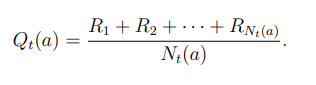
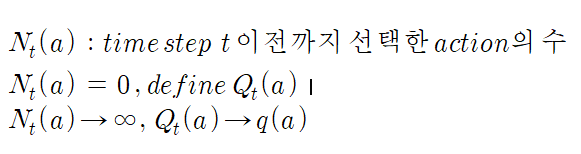
+ 이런 방법을 sample-average 방법이라고 하며, 액션의 가치를 측정하기 위한 최고의 방법은 아니지만, 여기서는 이 간단한 방법에 대해 알아보자.


p2(page 34):

+ 가장 간단한 액션 셀렉션 알고리즘은 가장 높게 측정된 value의 액션을 선택하는 것이다. 
+ 이 알고리즘은 greedy action selection 이라고 하는데, 가치 Q를 최대화 할 수 있는 액션 a를 선택한다.
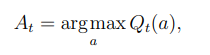
+ greedy action selection은 항상 exploitation 하는 것으로, 즉시 얻을 수 있는 보상을 최대화 한다.

+ 간단한 대안으로, 엡실론-그리디 방법(ε-greedy)이 있다. 일정한 확률(하이퍼 파리미터 엡실론의 값)로 탐험(exploration)하게 만드는 방법으로, 기본적으로 greedy 방법과 동일하지만 일정 확률로 랜덤 셀렉트를 하게 한다.
+ 이 방법의 장점은 기존 그리디 방법과 다르게 탐험을 일정 횟수 시도하면서도, 횟수 t가 제한적으로 증가하여 모든 액션을 조사할 수 있는 경우, 결국 최종 종합 가치는 q(a)로 수렴하는 데 있다.

p3:

+ greedy method와 ε-greedy method 비교 실험
+ n=10 (10대의 슬롯 머신), 2000 randomly generated task, 각 action value q(a)는 평균0, 분산1의 가우시안 분포  
액션에 따른 보상 R은 평균0, 분산 1의 가우시안 분포.
+ Fig2.1 - 1000스텝 진행 한 결과 그래프

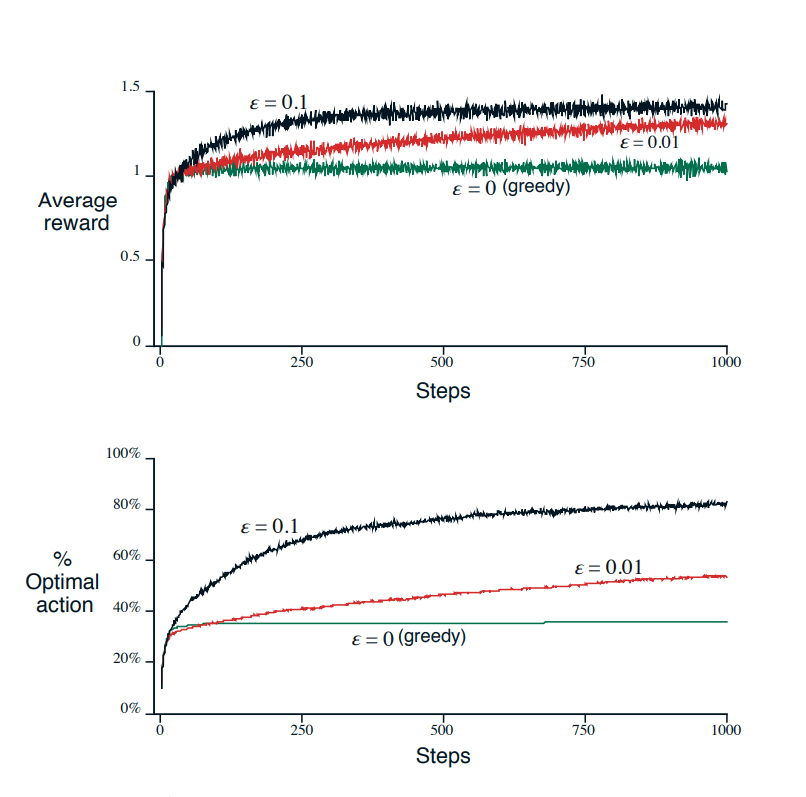

p4:

+ greedy 방법과 두 ε-greedy 방법 비교 (ε=0.01 and ε=0.1)
+ 위의 그래프에서는 경험을 많이 할수록 (진행이 많이 될 수록) 기대할 수 있는 보상이 증가하는 것을 볼 수 있다.
+ 아래 그래프 설명은 이 못함.
+ "The lower graph shows that the greedy method found the optimal action in only approximately one-third of the tasks. In the other two-thirds, its initial samples of the optimal action were disappointing, and it never returned to it."

+ ε-greedy 방법이 더 결과가 좋은데, 이는 탐험을 통해 더 나은 옵티멀 액션을 찾을 기회가 있기 때문이다.
+ ε-greedy 방법에서 , ε = 0.1인 경우에 결과가 이른 시간에 상승하여 큰 값이 나온다. 이 실험의 경우 1000까지 실험을 한 결과이기에 ε=0.1인 경우가 더 우수하게 보이지만, 실험을 계속하면 ε=0.01인 경우가 두 값에서 더 우수한 결과를 보인다고 한다.
+ 또한 시간의 경과에 따라 ε값을 줄여서 초반의 빠른 상승과 최종적으로 더 높은 값을 보이는 특성을 활용할 수 있다. 

p5(page 36):

+ 두 방법중 어느 것이 더 나은지는 태스크에 달려있다. 예를들어, 보상의 분산이 0인 경우, greedy 방법이 가장 좋은 결과를 낼 것이다. 이와 반대로 보상의 true value가 계속 변하는 경우에는 탐색 방법이 더 좋은 결과를 얻을 것이다.
+ 강화학습에서는 exploration과 exploitation에 균형을 맞추는 것이 필요하다.

**2.3 Incremental Implementation**

p1:

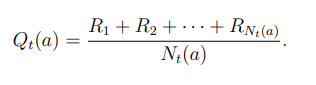
+ True value를 구하는 공식은 매우 간단한데, 이 간단한 구현 방식의 문제는 시간이 지남에 따라 용량과 컴퓨팅 요구사항이 제한없이 증가한다는 점이다. 
+ 즉, 액션의 선택에 따른 추가적인 보상을 저장하기 위해서는 더 많은 메모리가 필요하고, 가치 Q를 결정하기 위해 더 많은 계산이 요구된다.

p2(page 37):

+ 이를 해결하기 위해 간단한 계산을 통해 용량과 계산량을 줄이는 방법이 있다.
+ 합연산(시그마)를 제거하고 이전의 가치와 현재 보상만을 이용한 공식으로 변경할 수 있다.
+ equation 2.3
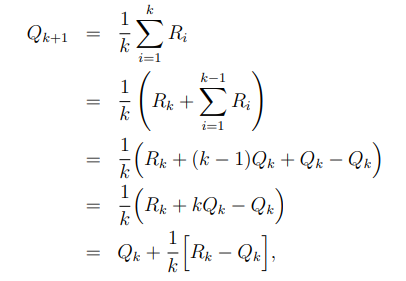

p3:

+ general form : NewEstimate ← OldEstimate + Stepsize(Target-OldEstimate)
+ (Target-OldEstimate)=error. 이 값은 Target에 근사할 수록 작아진다. Target은 바람직한 방향을 지시하는 것으로 간주한다.

p4(page 38) :

+ stepsize 파라미터는 1/k이다. (스텝 진행에 따라 변동)
+ 이 책에서는 (후반부에서) 스텝사이즈는 알파로 α 나타낸다. 이 값은 k번째 액션과 가치를 고려할 때 k의 역수이다.

**Reference**